In [63]:
!pip install opencv-contrib-python

In [64]:
import cv2
import matplotlib.pyplot as plt

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


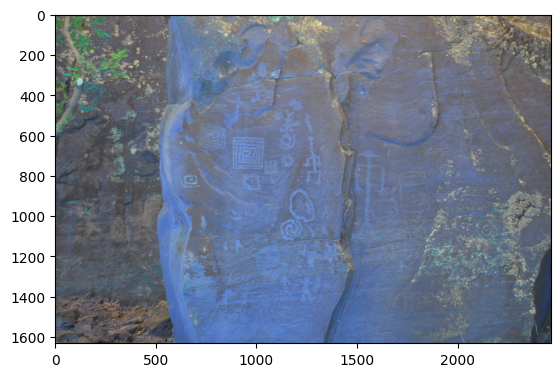

In [66]:
image = cv2.imread("/content/drive/MyDrive/Rockart Ready to Use/US/train/DSC_0077.JPG")
plt.imshow(image)
plt.show()


In [67]:
import numpy as np
def stack_3_channel(img, clipLimit = 20 ,  tileGridSize=(16,16)):
  img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

  hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  h, s, v = hsv_img[:,:,0], hsv_img[:,:,1], hsv_img[:,:,2]



  clahe = cv2.createCLAHE(clipLimit, tileGridSize)
  v = clahe.apply(v) #stretched histogram for showing the image with better contrast - its not ok to use it for scientific calculations

  hsv_img = np.dstack((h,s,v))

  # NOTE: HSV2RGB returns BGR instead of RGB
  bgr_stretched = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)

  #reversing the bands back to RGB
  rgb_stretched = np.zeros(bgr_stretched.shape)
  rgb_stretched[:,:,0] = bgr_stretched[:,:,2]
  rgb_stretched[:,:,1] = bgr_stretched[:,:,1]
  rgb_stretched[:,:,2] = bgr_stretched[:,:,0]

  # if the valuse are float, plt will have problem showing them
  rgb_stretched = rgb_stretched.astype('uint8')

  return rgb_stretched

In [68]:
import os
import shutil
from pathlib import Path
import xml.etree.ElementTree as ET

In [69]:
def process_image(file):
  image = cv2.imread(file)
  gray_image  = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  #plt.imshow(gray_image, cmap = plt.cm.gray)
  #plt.show()

  ret1, threshold_1 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
  #plt.imshow(threshold_1, cmap = plt.cm.gray)
  #plt.show()

  threshold_2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
  #plt.imshow(threshold_2, cmap = plt.cm.gray)
  #plt.show()

  #blur = cv2.GaussianBlur(gray_image, (5,5), 0)
  #ret3,threshold_3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  #plt.imshow(threshold_3, cmap = plt.cm.gray)
  #plt.show()

  #contours, hierarchy = cv2.findContours(threshold_1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  #cv2.drawContours(threshold_3, contours, -1, (0,255,0), 3)
  #plt.imshow(threshold_3, cmap = plt.cm.gray)
  #plt.show()

  thinned = cv2.ximgproc.thinning(threshold_1)
  #plt.imshow(thinned, cmap = plt.cm.gray)
  #plt.show()

  stretched = stack_3_channel(image)
  #plt.imshow(stretched, cmap = plt.cm.gray)
  #plt.show()

  return [['grayscale', 'binary_threshold', 'adaptive_threshold', 'stretch','thinned'], [gray_image, threshold_1, threshold_2, stretched,thinned]]

In [70]:
def update_xml_file(xml_path, new_filename):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    for filename in root.iter('filename'):
        filename.text = new_filename
    tree.write(xml_path)

In [62]:
image_path = "/content/drive/MyDrive/Rockart Ready to Use/US/train/"  # update this to match directory of png files
processed_image_path = "/content/drive/MyDrive/Rockart Ready to Use/US/Processed/"
directory_files = os.listdir(image_path)

for file in directory_files:
    if file.lower().endswith(".jpg"):
        processed_files = process_image(os.path.join(image_path, file))
        for i in range(len(processed_files[0])):
            processed_filename = processed_files[0][i] + "_" + file
            print(processed_filename)
            cv2.imwrite(os.path.join(processed_image_path, processed_filename), processed_files[1][i])

            processed_filename_xmls = processed_files[0][i] + "_" + Path(os.path.join(image_path, file)).stem + ".xml"
            print(processed_filename_xmls)
            original_xml_path = os.path.join(image_path, Path(os.path.join(image_path, file)).stem + ".xml")
            new_xml_path = os.path.join(processed_image_path, processed_filename_xmls)
            shutil.copyfile(original_xml_path, new_xml_path)

            new_image_filename = processed_files[0][i] + "_" + file
            update_xml_file(new_xml_path, new_image_filename)

grayscale_DSC_0861.JPG
grayscale_DSC_0861.xml
binary_threshold_DSC_0861.JPG
binary_threshold_DSC_0861.xml
adaptive_threshold_DSC_0861.JPG
adaptive_threshold_DSC_0861.xml
stretch_DSC_0861.JPG
stretch_DSC_0861.xml
thinned_DSC_0861.JPG
thinned_DSC_0861.xml
grayscale_DSC_0302.JPG
grayscale_DSC_0302.xml
binary_threshold_DSC_0302.JPG
binary_threshold_DSC_0302.xml
adaptive_threshold_DSC_0302.JPG
adaptive_threshold_DSC_0302.xml
stretch_DSC_0302.JPG
stretch_DSC_0302.xml
thinned_DSC_0302.JPG
thinned_DSC_0302.xml
grayscale_DSC_0738.JPG
grayscale_DSC_0738.xml
binary_threshold_DSC_0738.JPG
binary_threshold_DSC_0738.xml
adaptive_threshold_DSC_0738.JPG
adaptive_threshold_DSC_0738.xml
stretch_DSC_0738.JPG
stretch_DSC_0738.xml
thinned_DSC_0738.JPG
thinned_DSC_0738.xml
grayscale_DSC_0286.JPG
grayscale_DSC_0286.xml
binary_threshold_DSC_0286.JPG
binary_threshold_DSC_0286.xml
adaptive_threshold_DSC_0286.JPG
adaptive_threshold_DSC_0286.xml
stretch_DSC_0286.JPG
stretch_DSC_0286.xml
thinned_DSC_0286.JPG
thinn

KeyboardInterrupt: 